<a href="https://colab.research.google.com/github/PreamJ/LDA_TopicModelling_Legal/blob/main/topicmodelling_answer02_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
import numpy as np
import re
import gensim
from pythainlp.tokenize import word_tokenize
from pythainlp.corpus import thai_stopwords
from wordcloud import WordCloud
from gensim import corpora, models, similarities
import pyLDAvis
from pprint import pprint
import pickle 
import os
import matplotlib.pyplot as plt
from gensim.models import CoherenceModel
from gensim.test.utils import datapath
import random
from gensim.models.ldamodel import LdaModel
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from gensim.corpora import MmCorpus

In [43]:
data = pd.read_csv('dataset/DatasetLegal.csv')
data.answer.head()

0    ดอกเบี้ยของเงินฝากสินส่วนตัวของภริยาย่อมเป็นดอ...
1    คุณสามารถร้องขอเป็นผู้จัดการมรดกของบิดาได้ส่วน...
2    เช็คลงวันที่ไม่ตรงกับวันครบกำหนดสัญญา้จะฟ้องร้...
3    คุณมีทางเลือกอยู่ประการประการแรกยื่นคำร้องเพื่...
4    คดีที่มีการฟ้องร้องแล้วและศาลอ่านคำพิพากษาเกิน...
Name: answer, dtype: object

In [44]:
str_answer = data['answer'].astype(str)
str_answer = str_answer.map(lambda x: re.sub('[,\.!?#]', '', x))

<>:2: DeprecationWarning: invalid escape sequence \.
<>:2: DeprecationWarning: invalid escape sequence \.
C:\Users\User\AppData\Local\Temp\ipykernel_12524\1645713181.py:2: DeprecationWarning: invalid escape sequence \.
  str_answer = str_answer.map(lambda x: re.sub('[,\.!?#]', '', x))


In [45]:
sentense_token_answer = []
for each_answer in str_answer:
  sentense_token_answer.append(each_answer)
print(sentense_token_answer[:5])
train_data = sentense_token_answer[:6030]
test_data = sentense_token_answer[6031:7030]

['ดอกเบี้ยของเงินฝากสินส่วนตัวของภริยาย่อมเป็นดอกผลนิตินัยของสินส่วนตัวดอกเบี้ยดังกล่าวจึงเป็นสินสมรสตามความปพพมาตราแต่การที่ท่านประสงค์จะทำข้อตกลงหรือจดแจ้งไว้ในทะเบียนสมรสเกี่ยวด้วยเรื่องการเปลี่ยนดอกเบี้ยเงินฝากสินสมรสให้เป็นสินส่วนตัวของภริยาแต่เพียงฝ่ายเดียวไม่อาจกระทำได้โดยชอบเพราะเป็นการที่มีวัตถุประสงค์ต้องห้ามชัดแจ้งโดยกฎหมายและขัดต่อความสงบเรียบร้อยหรือศีลธรรมอันดีของประชาชนหากท่านและสามีฝ่าฝืนกระทำไปซึ่งเป็นการทำสัญญาระหว่างสมรสเกี่ยวกับทรัพย์สินระหว่างสามีภริยานั้นสัญญานั้นย่อมตกเป็นมฆะตามมาตราแต่อย่างไรก็ตามสามีอาจทำสัญญาการสละสิทธิแห่งดอกเบี้ยเงินฝากดังกล่าวที่เป็นสินสมรสในส่วนของตนให้แก่ภริยาได้อันเป็นการทำสัญญาระหว่างสมรสได้แต่อาจถูกบอกล้างเสียในระหว่างที่เป็นสามีภริยากันอยู่หรือภายในกำหนดปีนับแต่วันที่ขาดจากการเป็นสามีภริยากันก็ได้ตามปพพมาตราส่วนเงินเดือนค่าจ้างของสามีที่ได้มาระหว่างสมรสกับสินสมรสแต่ตราบใดที่ยังเป็นสามีภริยากันตามกฎหมายสามีหรือภริยาจะเรียกให้แบ่งแยกทรัพย์ที่เป็นสินสมรสรวมทั้งเงินเดือนค่าจ้างนี้ไม่อาจกระทำได้โดยชอบตามมาตรา', 'คุณสามารถร้องขอเป็นผู้จัดกา

In [46]:
word_token_answer = []
for sentense in train_data:
  word = word_tokenize(sentense, engine='newmm')
  word_token_answer.append(word)

print(word_token_answer[0][:10])

['ดอกเบี้ย', 'ของ', 'เงินฝาก', 'สินส่วนตัว', 'ของ', 'ภริยา', 'ย่อม', 'เป็น', 'ดอกผลนิตินัย', 'ของ']


In [59]:
stopwords = list(thai_stopwords())
read_stopwords = pd.read_csv('dataset/add_stopwords.csv')
add_stopwords = read_stopwords['stopword'].values.tolist()
processed_answer = []
for sentense in word_token_answer:
  each_sentense = []
  for word in sentense:
    if(word not in stopwords + add_stopwords):
      each_sentense.append(word)
  processed_answer.append(each_sentense)
print(processed_answer[0][:8])

['ดอกเบี้ย', 'เงินฝาก', 'สินส่วนตัว', 'ภริยา', 'ดอกผลนิตินัย', 'สินส่วนตัว', 'ดอกเบี้ย', 'สินสมรส']


In [60]:
id2word = corpora.Dictionary(processed_answer)
# print(id2word)
with open('model/id2word.pkl', 'wb') as f:
    pickle.dump(id2word, f)

In [61]:
corpus = []
for text in processed_answer:
  vec = id2word.doc2bow(text)
  corpus.append(vec)
MmCorpus.serialize('model/corpus.mm', corpus)

In [62]:
num_topics = 7
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics,
                                       iterations=100,
                                       chunksize=800,
                                       passes=5,
                                       alpha=0.5,
                                       eta=0.01
                                       )

In [63]:
# from gensim.test.utils import datapath

#saving model to disk.
# temp_file = datapath("lda_model.pickle")
# lda_model.save(temp_file)
with open('model/lda_model.pkl', 'wb') as f:
    pickle.dump(lda_model, f)

In [2]:
topic_dict = {
    0 : "Contract",
    1 : "Family",
    2 : "Labor",
    3 : "Children",
    4 : "Sentence",
    5 : "lawyer",
    6 : "Succession"
}

with open('model/topic_dict.pkl', 'wb') as f:
    pickle.dump(topic_dict, f)


In [65]:
lda_model.show_topics(num_topics=10, num_words=10)

[(0,
  '0.026*"สัญญา" + 0.025*"เงิน" + 0.021*"ชำระหนี้" + 0.020*"ฟ้อง" + 0.018*"เจ้าหนี้" + 0.018*"เช่าซื้อ" + 0.015*"บังคับ" + 0.015*"ลูกหนี้" + 0.014*"รับผิด" + 0.013*"หนี้"'),
 (1,
  '0.063*"สามี" + 0.050*"มาตรา" + 0.035*"ภริยา" + 0.026*"ปพพ" + 0.021*"ฟ้องหย่า" + 0.017*"หญิง" + 0.015*"ตามกฎหมาย" + 0.013*"สิทธิ" + 0.013*"ภรรยา" + 0.012*"สินสมรส"'),
 (2,
  '0.066*"นายจ้าง" + 0.054*"ลูกจ้าง" + 0.025*"มาตรา" + 0.025*"จ่าย" + 0.023*"สิทธิ" + 0.021*"เลิกจ้าง" + 0.020*"ทำงาน" + 0.019*"บริษัท" + 0.018*"คุ้มครอง" + 0.018*"ค่าจ้าง"'),
 (3,
  '0.071*"บุตร" + 0.034*"บิดา" + 0.024*"มารดา" + 0.022*"เด็ก" + 0.019*"จดทะเบียน" + 0.016*"แม่" + 0.014*"พ่อ" + 0.012*"ผู้เยาว์" + 0.011*"ลูก" + 0.010*"ปกครอง"'),
 (4,
  '0.043*"ศาล" + 0.021*"มาตรา" + 0.019*"จำเลย" + 0.018*"ความผิด" + 0.017*"จำคุก" + 0.014*"กระทำความผิด" + 0.013*"ฐาน" + 0.010*"คำพิพากษา" + 0.010*"บาท" + 0.010*"ลงโทษ"'),
 (5,
  '0.034*"ตอบ" + 0.031*"ทนาย" + 0.021*"สัญญา" + 0.014*"ถาม" + 0.014*"จ่าย" + 0.011*"กฎหมาย" + 0.011*"บริษัท" + 0.011*

In [67]:
lda_model.log_perplexity(corpus)

-12.387011152418845

In [71]:
from matplotlib.font_manager import FontProperties
font_path = 'C:\Pream\THSarabun.ttf'
font = FontProperties(fname=font_path, size = 20)
def plotWordDist(n):
  topic_num = n
  topic_words = lda_model.show_topic(topic_num, topn=10)
  words = [word_prob[0] for word_prob in topic_words]
  probs = [word_prob[1] for word_prob in topic_words]

  fig, ax = plt.subplots(figsize=(10, 6))
  ax.bar(words, probs, width=0.6)
  ax.set_title(f"Word Distribution for Topic {topic_dict.get(topic_num)}")
  ax.set_xlabel("Words")
  ax.set_ylabel("Probabilities")
  plt.xticks(fontproperties=font) 
  plt.show()

<>:2: DeprecationWarning: invalid escape sequence \P
<>:2: DeprecationWarning: invalid escape sequence \P
C:\Users\User\AppData\Local\Temp\ipykernel_12524\1390831608.py:2: DeprecationWarning: invalid escape sequence \P
  font_path = 'C:\Pream\THSarabun.ttf'


In [68]:
# load saved model using pickle
with open('model/lda_model.pkl', 'rb') as f:
    lda_model = pickle.load(f)

In [ ]:
plotWordDist(0)
plotWordDist(1)
plotWordDist(2)
plotWordDist(3)
plotWordDist(4)
plotWordDist(5)
plotWordDist(6)

In [75]:
# word-topic distribution
for i in range(lda_model.num_topics):
    print(f"Topic {topic_dict.get(i)}:")
    for word, prob in lda_model.show_topic(i):
        print(f"{word}: {prob:.4f}")
    print("\n")

Topic Contract:
สัญญา: 0.0261
เงิน: 0.0250
ชำระหนี้: 0.0214
ฟ้อง: 0.0202
เจ้าหนี้: 0.0182
เช่าซื้อ: 0.0175
บังคับ: 0.0154
ลูกหนี้: 0.0151
รับผิด: 0.0136
หนี้: 0.0131


Topic Family:
สามี: 0.0627
มาตรา: 0.0498
ภริยา: 0.0350
ปพพ: 0.0265
ฟ้องหย่า: 0.0207
หญิง: 0.0170
ตามกฎหมาย: 0.0154
สิทธิ: 0.0130
ภรรยา: 0.0129
สินสมรส: 0.0123


Topic Labor:
นายจ้าง: 0.0655
ลูกจ้าง: 0.0540
มาตรา: 0.0251
จ่าย: 0.0248
สิทธิ: 0.0227
เลิกจ้าง: 0.0205
ทำงาน: 0.0201
บริษัท: 0.0189
คุ้มครอง: 0.0178
ค่าจ้าง: 0.0177


Topic Children:
บุตร: 0.0711
บิดา: 0.0340
มารดา: 0.0239
เด็ก: 0.0216
จดทะเบียน: 0.0189
แม่: 0.0161
พ่อ: 0.0139
ผู้เยาว์: 0.0116
ลูก: 0.0114
ปกครอง: 0.0104


Topic Sentence:
ศาล: 0.0434
มาตรา: 0.0214
จำเลย: 0.0194
ความผิด: 0.0184
จำคุก: 0.0167
กระทำความผิด: 0.0137
ฐาน: 0.0134
คำพิพากษา: 0.0104
บาท: 0.0103
ลงโทษ: 0.0103


Topic lawyer:
ตอบ: 0.0341
ทนาย: 0.0310
สัญญา: 0.0208
ถาม: 0.0144
จ่าย: 0.0142
กฎหมาย: 0.0111
บริษัท: 0.0111
แจ้ง: 0.0111
ทราบ: 0.0086
ไม่ต้อง: 0.0084


Topic Succession:
ที่ดิน: 0.06

In [76]:
#topic-document distribution
for i, doc in enumerate(corpus[:5]):
    print(f"Document {i}:")
    for topic, prob in lda_model.get_document_topics(doc):
        print(f"Topic {topic_dict.get(topic)}: {prob:.4f}")
    print("\n")

Document 0:
Topic Contract: 0.1729
Topic Family: 0.6798
Topic Labor: 0.0614
Topic lawyer: 0.0148
Topic Succession: 0.0577


Document 1:
Topic Contract: 0.1592
Topic Family: 0.0130
Topic Labor: 0.0123
Topic Children: 0.3718
Topic Sentence: 0.0514
Topic lawyer: 0.0521
Topic Succession: 0.3402


Document 2:
Topic Contract: 0.6605
Topic Children: 0.1231
Topic Sentence: 0.0188
Topic lawyer: 0.1458
Topic Succession: 0.0425


Document 3:
Topic Contract: 0.0174
Topic Family: 0.0174
Topic Labor: 0.0170
Topic Children: 0.1159
Topic Sentence: 0.0187
Topic lawyer: 0.0537
Topic Succession: 0.7600


Document 4:
Topic Contract: 0.6618
Topic Family: 0.0330
Topic Labor: 0.0511
Topic Children: 0.1103
Topic Sentence: 0.0608
Topic lawyer: 0.0790




Find optimize number of topics between 2-10
and plot coherence value each topic

In [ ]:
min_topics, max_topics = 2, 20
step_size = 1

coherence_scores = []
num_topics_list = []

for num_topics in range(min_topics, max_topics+1, step_size):
  lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                              id2word=id2word,
                                              num_topics=num_topics,
                                              passes=10,
                                              iterations=100,
                                              chunksize=200,
                                              alpha=0.5,
                                              eta=0.01)
  coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_answer, dictionary=id2word, coherence='c_v')
  coherence_score = coherence_model_lda.get_coherence()
  coherence_scores.append(coherence_score)
  num_topics_list.append(num_topics)

coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_answer, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()

plt.plot(num_topics_list, coherence_scores)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.show()
# Find the optimal number of topics with the highest coherence score
optimal_num_topics = num_topics_list[coherence_scores.index(max(coherence_scores))]
print(f"Optimal number of topics: {optimal_num_topics}\nMax coherence score : {max(coherence_scores)}")

word distribution as bar plot

bar plot for topic-document distribution

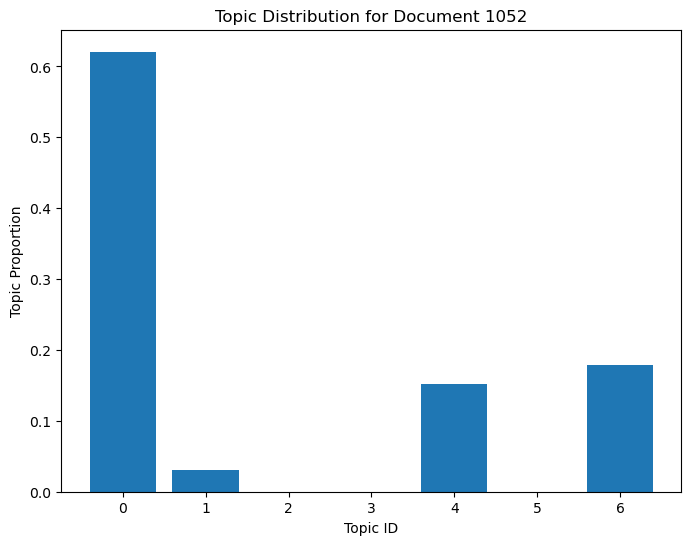

In [77]:
doc_id = np.random.randint(len(train_data)) 
doc_topics = lda_model.get_document_topics(corpus[doc_id]) 

# plot the bar chart
plt.figure(figsize=(8,6))
plt.bar([t[0] for t in doc_topics], [t[1] for t in doc_topics])
plt.xlabel('Topic ID')
plt.ylabel('Topic Proportion')
plt.title(f'Topic Distribution for Document {doc_id}')
plt.show()

topic for each document

In [78]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus):
  sent_topics_df = pd.DataFrame()
  for i, row in enumerate(ldamodel[corpus]):
      row = sorted(row, key=lambda x: (x[1]), reverse=True)
      for j, (topic_num, prop_topic) in enumerate(row):
          if j == 0:  # => dominant topic
              wp = ldamodel.show_topic(topic_num)
              topic_keywords = ", ".join([word for word, prop in wp])
              sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4)]), ignore_index=True)
          else:
            break
  return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib']

# Show
df_dominant_topic.head(20)
 

C:\Users\User\AppData\Local\Temp\ipykernel_12524\1531488701.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4)]), ignore_index=True)
C:\Users\User\AppData\Local\Temp\ipykernel_12524\1531488701.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4)]), ignore_index=True)


,Document_No,Dominant_Topic,Topic_Perc_Contrib
0,0,1.0,0.6798
1,1,3.0,0.3718
2,2,0.0,0.6605
3,3,6.0,0.7600
4,4,0.0,0.6618
5,5,4.0,0.9174
6,6,0.0,0.5227
7,7,4.0,0.5974
8,8,6.0,0.8922
9,9,4.0,0.6309


lda visualization

In [79]:
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./ldavis_prepared_'+str(num_topics))

LDAvis_data_filepath
if 1 == 1:
    LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

c:\Users\User\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.055515 -0.098714       1        1  19.823129
4     -0.002764  0.095402       2        1  19.760644
2     -0.193035  0.202789       3        1  15.454065
6      0.237248  0.003765       4        1  15.351421
3      0.108164 -0.248298       5        1  10.347805
5     -0.252201 -0.128610       6        1  10.080595
1      0.158102  0.173666       7        1   9.182342, topic_info=        Term         Freq        Total Category  logprob  loglift
377  นายจ้าง  2935.000000  2935.000000  Default  30.0000  30.0000
306   ที่ดิน  2763.000000  2763.000000  Default  29.0000  29.0000
178     บุตร  2259.000000  2259.000000  Default  28.0000  28.0000
379  ลูกจ้าง  2415.000000  2415.000000  Default  27.0000  27.0000
35      สามี  1669.000000  1669.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
104     ฟ้อง   221.374406  2426.267463   Topic7  -4.7882  -0.0064
157      ศาล   242.756241  3946.609516   Topic7  -4.6960  -0.4007
345     กรณี   204.459605  2234.682468   Topic7  -4.8676  -0.0036
0     กฎหมาย   167.479058  1361.878499   Topic7  -5.0672   0.2921
556     บ้าน   161.606896  1120.644047   Topic7  -5.1028   0.4514

[476 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
0         1  0.088114  กฎหมาย
0         2  0.168150  กฎหมาย
0         3  0.186507  กฎหมาย
0         4  0.135108  กฎหมาย
0         5  0.060211  กฎหมาย
...     ...       ...     ...
4262      6  0.999919       ๙
2093      3  0.046065       “
2093      6  0.952015       “
2094      3  0.036433       ”
2094      6  0.962881       ”

[912 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 5, 3, 7, 4, 6, 2])

The sections below are in the process of being updated with new documents.

In [80]:
def preprocess(text):
  result = []
  str_text = str(text).replace(' ','')
  word_token = word_tokenize(str_text, engine='newmm')
  stopwords = list(thai_stopwords())
  read_stopwords = pd.read_csv('dataset/add_stopwords.csv')
  add_stopwords = read_stopwords['stopword'].values.tolist()
  for word in word_token:
    if(word not in stopwords + add_stopwords):
      result.append(word)
  #result = map(lambda x: re.sub('[,/.?# ]', '', x), result)
  return result

In [81]:
def bow(text):
  with open('model/id2word.pkl', 'rb') as f:
    id2word = pickle.load(f)
  vector = id2word.doc2bow(text)
  return vector

In [82]:
new_doc = random.choice(test_data)
test_doc = preprocess(new_doc)
test_doc = bow(test_doc)

In [84]:
lda_model = LdaModel.load('model/lda_model.pkl')
new_doc_topics = lda_model.get_document_topics(test_doc)
new_doc_topics_dict = {topic_dict[topic]: prob for topic, prob in new_doc_topics}
print(new_doc_topics_dict)

{'Contract': 0.65052676, 'Family': 0.036553934, 'Labor': 0.07191045, 'Children': 0.047396403, 'Sentence': 0.087560296, 'lawyer': 0.069334775, 'Succession': 0.036717333}


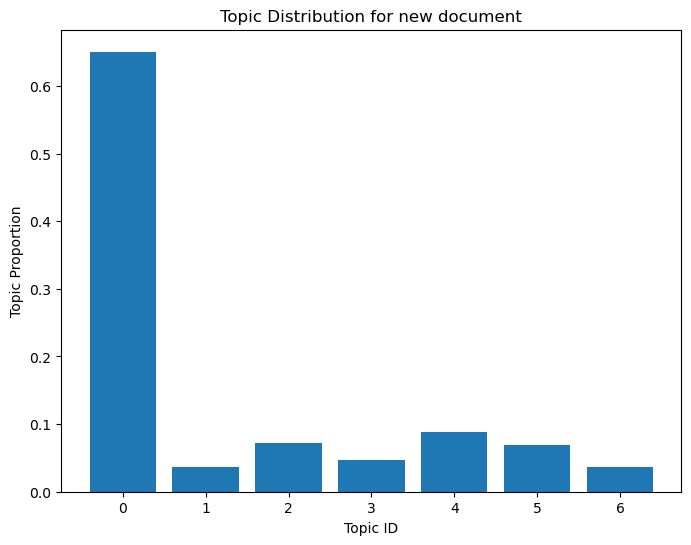

In [85]:
# plot the bar chart
plt.figure(figsize=(8,6))
plt.bar([t[0] for t in new_doc_topics], [t[1] for t in new_doc_topics])
plt.xlabel('Topic ID')
plt.ylabel('Topic Proportion')
plt.title(f'Topic Distribution for new document')
plt.show()

Similarity query

In [89]:
corpus = gensim.corpora.MmCorpus('model/corpus.mm')
data = pd.read_csv('dataset/DatasetLegal.csv')
with open('model/id2word.pkl', 'rb') as f:
  id2word = pickle.load(f)
corpus_lda = lda_model[corpus]
index = similarities.MatrixSimilarity(corpus_lda, num_features=len(id2word))
sims = index[new_doc_topics]
print(type(sims))
sims_sorted = sorted(enumerate(sims), key=lambda item: -item[1])
print(f"Topic distribution for new document : {new_doc_topics}\n{new_doc}\n")
for doc_id, similarity in sims_sorted[:5]:
    print(f"Document ID: {doc_id}, Similarity score: {similarity}")
    print(data.answer[doc_id])
    print("Topic distribution for similar document : ")
    for num, dis in corpus_lda[doc_id]:
      print(f"\t({topic_dict.get(num)}, {'%.5f' %dis})")
    #print("\n")
    #print(f"Topic distribution for similar document : \n{corpus_lda[doc_id]}\n")

<class 'numpy.ndarray'>
Topic distribution for new document : [(0, 0.65052676), (1, 0.036553934), (2, 0.07191045), (3, 0.047396403), (4, 0.087560296), (5, 0.069334775), (6, 0.036717333)]
น่าจะมีอายุความปีอย่าได้ไปหวังหลุดหนี้โดยใช้อายุความไฟแนนซ์เขามีทีมกฎหมายที่เข้มแข็งคงไม่ปล่อยให้หนี้สูญได้ง่ายๆ

Document ID: 3728, Similarity score: 0.9983065724372864
หากรถไม่ได้เปลี่ยนแปลงชื่อผู้เช่าซื้อก็จะติดอยู่ตลอดไปแต่หากเปลี่ยนแล้วข้อมูลก็จะถูกแก้ไขหลังจากมีการเปลี่ยนแปลงข้อมูลไม่มียอดค้างชำระ
Topic distribution for similar document : 
	(Contract, 0.63458)
	(Family, 0.04780)
	(Labor, 0.05280)
	(Children, 0.06163)
	(Sentence, 0.06910)
	(lawyer, 0.08248)
	(Succession, 0.05162)
Document ID: 5023, Similarity score: 0.9980394244194031
เมื่อมีหลักฐานการกู้ยืมก็ฟ้องได้แต่เขาจะมีทรัพย์สินอะไรให้คุณยึดมาขายทอดตลาดเพื่อใช้หนี้หรือไม่ก็เป็นเรื่องที่คุณต้องพิจารณาให้ดี
Topic distribution for similar document : 
	(Contract, 0.68603)
	(Family, 0.04265)
	(Labor, 0.04164)
	(Children, 0.04136)
	(Sentence, 0.0

In [52]:
print(corpus_lda[0])
print(sims_sorted[:10])
print(index)
print(index[new_doc_topics])  

[(1, 0.64718866), (2, 0.012049023), (5, 0.21010305), (6, 0.1107332)]
[(4925, 0.99957275), (5070, 0.998647), (3420, 0.9981044), (382, 0.99796355), (1776, 0.99787885), (3704, 0.99778986), (1421, 0.9972182), (4434, 0.99717665), (4, 0.99705076), (5727, 0.99703896)]
MatrixSimilarity<6030 docs, 10043 features>
[0.3106109  0.42493957 0.90341425 ... 0.35561863 0.15369038 0.15746737]


In [ ]:
lda_model.update([new_doc_topics])

/usr/local/lib/python3.9/dist-packages/gensim/models/ldamodel.py:850: RuntimeWarning: overflow encountered in exp2
  perwordbound, np.exp2(-perwordbound), len(chunk), corpus_words
